<a href="https://colab.research.google.com/github/arjunsumina/analytics_code/blob/main/logistic_linear_regression_code_4000.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

given 11 features of a candy, you need to predict whether it is chocolate or not

In [1]:
# Import libraries, features and settings (not all of these are needed so pull what you need)
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import io
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn import preprocessing
plt.rc("font", size = 14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
sns.set(style="white")
sns.set(style="whitegrid", color_codes = True)

In [2]:
# Built in colab with local data upload

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving candy-data.csv to candy-data.csv
User uploaded file "candy-data.csv" with length 5193 bytes


read the data 

In [3]:
df = pd.read_csv(io.StringIO(uploaded['candy-data.csv'].decode('utf-8')))
df = df[['fruity','caramel','peanutyalmondy','nougat','crispedricewafer','hard', 'bar','pluribus','sugarpercent','pricepercent','winpercent','chocolate']] 	

df.head()

,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,chocolate
0,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,1
1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,1
2,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,0
3,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,0
4,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,0


split the data into train and test

In [6]:
from sklearn.model_selection import train_test_split
trainingSet, testSet = train_test_split(df, test_size=0.3)
train_df = trainingSet
test_df = testSet

training and testing set

In [7]:
X_train = train_df[['fruity','caramel','peanutyalmondy','nougat','crispedricewafer','hard', 'bar','pluribus','sugarpercent','pricepercent','winpercent']] 	
Y_train = train_df["chocolate"]
X_test = test_df[['fruity','caramel','peanutyalmondy','nougat','crispedricewafer','hard', 'bar','pluribus','sugarpercent','pricepercent','winpercent']] 	
Y_test = test_df["chocolate"]

In [8]:
len(X_train)

59

In [9]:
len(X_test)

26

training set has 35 non chocolates and 24 chocolates

In [10]:
Y_train.value_counts()

0    35
1    24
Name: chocolate, dtype: int64

chocolates and non-chocolates are display in bar plot

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


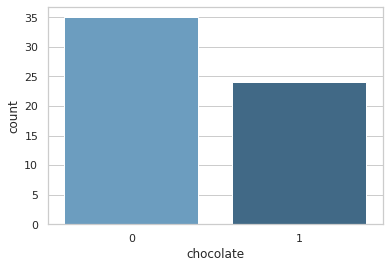

<Figure size 432x288 with 0 Axes>

In [11]:
sns.countplot("chocolate", data=train_df, palette='Blues_d')
plt.show()
plt.savefig('count_plot')

mean value of variables when they are chocolates and when they are non-chocolates

In [12]:
train_df.groupby('chocolate').mean()

,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
chocolate,,,,,,,,,,,
0,0.771429,0.114286,0.028571,0.000,0.000000,0.257143,0.000000,0.657143,0.461829,0.318743,43.361793
1,0.041667,0.291667,0.375000,0.125,0.291667,0.041667,0.541667,0.291667,0.536250,0.693833,63.502566


Model development and Prediction

In [17]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)
Y_pred = logreg.predict(X_test)

In [18]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)
cnf_matrix

array([[12,  1],
       [ 4,  9]])

fancy confusion matrix using heat map

Text(0.5, 257.44, 'Predicted label')

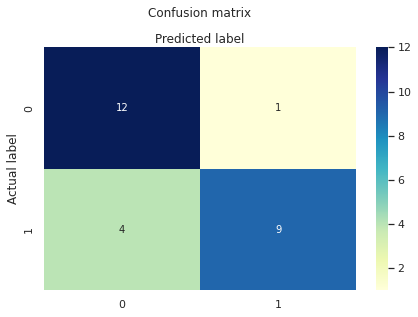

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [21]:
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))

Accuracy: 0.8076923076923077
Precision: 0.9
Recall: 0.6923076923076923


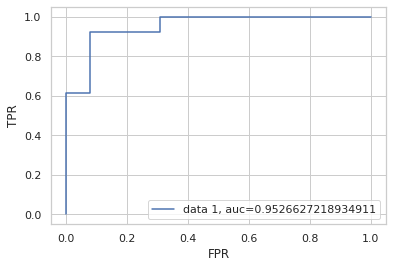

In [25]:
Y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_pred_proba)
auc = metrics.roc_auc_score(Y_test, Y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.ylabel("TPR")
plt.xlabel("FPR")
plt.show()